In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
from transformers import pipeline

In [2]:
df_reddit = pd.read_csv('/content/Reddit_Data.csv')
df_twitter = pd.read_csv('/content/Twitter_Data.csv')
display(df_reddit.head())
display(df_twitter.head())

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [3]:
print("--- Reddit Data Info ---")
df_reddit.info()
print("\n--- Twitter Data Info ---")
df_twitter.info()

print("\n--- Reddit Data Description ---")
display(df_reddit.describe())
print("\n--- Twitter Data Description ---")
display(df_twitter.describe())

print("\n--- Reddit Data Unique Categories ---")
display(df_reddit['category'].nunique())
print("\n--- Twitter Data Unique Categories ---")
display(df_twitter['category'].nunique())

print("\n--- Reddit Data Category Value Counts ---")
display(df_reddit['category'].value_counts())
print("\n--- Twitter Data Category Value Counts ---")
display(df_twitter['category'].value_counts())

--- Reddit Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB

--- Twitter Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB

--- Reddit Data Description ---


,category
count,37249.000000
mean,0.202771
std,0.778515
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000



--- Twitter Data Description ---


,category
count,162973.000000
mean,0.225436
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000



--- Reddit Data Unique Categories ---


3


--- Twitter Data Unique Categories ---


3


--- Reddit Data Category Value Counts ---


,count
category,
1,15830
0,13142
-1,8277



--- Twitter Data Category Value Counts ---


,count
category,
1.0,72250
0.0,55213
-1.0,35510


Merge Dataframes

In [4]:
df_reddit = df_reddit.rename(columns={'clean_comment': 'text'})
df_twitter = df_twitter.rename(columns={'clean_text': 'text'})
df_combined = pd.concat([df_reddit, df_twitter], ignore_index=True)
display(df_combined.head())
display(df_combined.info())

,text,category
0,family mormon have never tried explain them t...,1.0
1,buddhism has very much lot compatible with chr...,1.0
2,seriously don say thing first all they won get...,-1.0
3,what you have learned yours and only yours wha...,0.0
4,for your own benefit you may want read living ...,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200229 entries, 0 to 200228
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   text      200125 non-null  object 
 1   category  200222 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.1+ MB


None

Handle Missing Values

In [5]:
missing_values = df_combined.isnull().sum()
print("Number of missing values per column:")
print(missing_values)

Number of missing values per column:
text        104
category      7
dtype: int64


In [6]:
df_combined.dropna(inplace=True)
missing_values_after_drop = df_combined.isnull().sum()
print("\nNumber of missing values per column after dropping rows:")
print(missing_values_after_drop)


Number of missing values per column after dropping rows:
text        0
category    0
dtype: int64


In [8]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# (opsional, sering dibutuhkan untuk lemmatizer)
try:
    nltk.data.find('corpora/omw-1.4')
except LookupError:
    nltk.download('omw-1.4')

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

# Convert text to lowercase
df_combined['text'] = df_combined['text'].str.lower()

# Remove URLs
df_combined['text'] = df_combined['text'].apply(
    lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE)
)

# Remove special characters and punctuation, keep alphanumeric and spaces
df_combined['text'] = df_combined['text'].apply(
    lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x)
)

# Remove extra whitespace
df_combined['text'] = df_combined['text'].apply(
    lambda x: re.sub(r'\s+', ' ', x).strip()
)

# Tokenize text
df_combined['text'] = df_combined['text'].apply(word_tokenize)

# Remove stop words
stop_words = set(stopwords.words('english'))
df_combined['text'] = df_combined['text'].apply(
    lambda tokens: [word for word in tokens if word not in stop_words]
)

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization
df_combined['text'] = df_combined['text'].apply(
    lambda tokens: [lemmatizer.lemmatize(word) for word in tokens]
)

# Join tokens back into a string
df_combined['text'] = df_combined['text'].apply(lambda tokens: ' '.join(tokens))

display(df_combined.head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,text,category
0,family mormon never tried explain still stare ...,1.0
1,buddhism much lot compatible christianity espe...,1.0
2,seriously say thing first get complex explain ...,-1.0
3,learned want teach different focus goal wrappi...,0.0
4,benefit may want read living buddha living chr...,1.0


In [9]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    nltk.download('vader_lexicon')


# Initialize VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment label based on compound score
def get_vader_sentiment(text):
    if not isinstance(text, str):
        return 0 # Return neutral for non-string values, though we expect strings after cleaning
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 1 # Positive
    elif score <= -0.05:
        return -1 # Negative
    else:
        return 0 # Neutral

# Apply the VADER sentiment analysis to the 'text' column
df_combined['predicted_category_vader'] = df_combined['text'].apply(get_vader_sentiment)

display(df_combined.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,text,category,predicted_category_vader
0,family mormon never tried explain still stare ...,1.0,1
1,buddhism much lot compatible christianity espe...,1.0,1
2,seriously say thing first get complex explain ...,-1.0,1
3,learned want teach different focus goal wrappi...,0.0,1
4,benefit may want read living buddha living chr...,1.0,1


In [10]:
# 1. Calculate and display value counts for the original 'category' column
print("Value counts for original 'category' column:")
display(df_combined['category'].value_counts())

Value counts for original 'category' column:


,count
category,
1.0,88079
0.0,68253
-1.0,43786


In [11]:
# 2. Calculate and display value counts for the 'predicted_category_vader' column
print("\nValue counts for 'predicted_category_vader' column:")
display(df_combined['predicted_category_vader'].value_counts())


Value counts for 'predicted_category_vader' column:


,count
predicted_category_vader,
1,93654
-1,61136
0,45328


Logistic Regression Model

In [14]:
from sklearn.model_selection import train_test_split

X = df_combined['text']
y = df_combined['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (160094,)
Shape of X_test: (40024,)
Shape of y_train: (160094,)
Shape of y_test: (40024,)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limiting features to 5000 for manageability

# Fit on training data and transform both training and testing data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

Shape of X_train_tfidf: (160094, 5000)
Shape of X_test_tfidf: (40024, 5000)


📊 Logistic Regression Performance
Accuracy : 0.8812
Precision: 0.8821
Recall   : 0.8812
F1-Score : 0.8798

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.86      0.76      0.81      8860
         0.0       0.86      0.96      0.90     13527
         1.0       0.91      0.88      0.90     17637

    accuracy                           0.88     40024
   macro avg       0.88      0.87      0.87     40024
weighted avg       0.88      0.88      0.88     40024



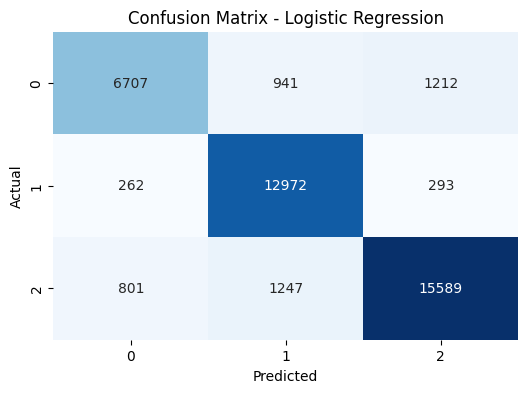

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Initialize logistic regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the logistic regression model
log_reg_model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_log_reg = log_reg_model.predict(X_test_tfidf)

# Calculate evaluation metrics
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average="weighted")
recall_log_reg = recall_score(y_test, y_pred_log_reg, average="weighted")
f1_log_reg = f1_score(y_test, y_pred_log_reg, average="weighted")

print("📊 Logistic Regression Performance")
print(f"Accuracy : {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall   : {recall_log_reg:.4f}")
print(f"F1-Score : {f1_log_reg:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()